Importing libraries

In [1]:
!pip install transformers==4.24

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2


In [2]:
pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.12.0
    Uninstalling accelerate-0.12.0:
      Successfully uninstalled accelerate-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1


In [1]:
import pandas as pd

In [4]:
import re
import nltk
#import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
#import datasets
#from transformers import Trainer, TrainingArguments
#from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn

from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, BertTokenizer, BertForSequenceClassification

# Training

import torch.optim as optim

# Evaluation
import seaborn as sns
from tqdm import tqdm


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/raw-and-cleaned-reviews/cleaned_reviews
/kaggle/input/imdb-spoiler-dataset/IMDB_movie_details.json
/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json


Don't start next 5 cells because already have cleaned dataset

In [7]:
# reviews_df = pd.read_json("/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json", lines=True)
# reviews_df

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [9]:
# reviews_df = reviews_df.drop_duplicates('review_text').sample(frac=1)
# print('shape:', reviews_df.shape)
# reviews_df.tail()

shape: (573385, 7)


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
139212,2011-05-07,tt0800369,ur23113044,False,I've known of the super hero Thor for a long t...,9,A genuine delight.
152065,2011-11-22,tt0478304,ur21339284,False,Okay it's fine to have abstractions and surrea...,1,"Senseless, just plain senseless"
99957,2006-07-03,tt0075686,ur0222418,False,Woody Allen is comedian Alvy Singer.He's Jewis...,10,The end of an affair
229958,2015-04-26,tt2395427,ur55859985,False,First of all let's break down the positives. 1...,7,Lower your expectations
533588,2002-01-07,tt0119528,ur1381998,False,In terms of comedy one of the best films I've ...,8,"Carrey's best, too bad for the American moralism"


In [10]:
df = pd.DataFrame(columns=['class', 'text'])
df['class'] = reviews_df['is_spoiler']
df['text'] = reviews_df['review_text']
df["class"] = df["class"].astype(int)

## Preprocessing 

Next commented steps have done before, so just import cleaned dataset

In [ ]:
# !pip install unidecode

In [ ]:
# # cleaning text
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'http\S+', '', text)
#     # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
#     text = unidecode.unidecode(text) 
#      # Pattern matching for all case alphabets
#     Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
#     # Limiting all the  repeatation to two characters.
#     Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
#     # Pattern matching for all the punctuations that can occur
#     Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
#     # Limiting punctuations in previously formatted string to only one.
#     Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
#     # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
#     text = re.sub(' {2,}',' ', Combined_Formatted)

#     # Remove special characters
#     pattern = r"[^a-zA-Z]"
#     text = re.sub(pattern,' ', text)
#     text = re.sub(r'\w*\d+\w*', '', text)
#     text = re.sub(r'\s{2,}', ' ', text)
#     text = re.sub(r'\s[^\w\s]\s', '', text)
#     return text

In [ ]:
# num_of_common = 15

In [ ]:
# from collections import Counter
# cnt = Counter()
# def count_words(df_part):
#     amount_of_words = 0
#     for text in df_part.values:
#         for word in text.split():
#             cnt[word] += 1
#     most_common = cnt.most_common(num_of_common)
#     for pair in most_common:
#         amount_of_words += pair[1]
#     percantage = amount_of_words/sum(cnt.values())
#     print(num_of_common, 'common words are',percantage*100, '% of text')
#     #print('total words:', sum(cnt.values()))
#     print(num_of_common, 'most common words:', most_common)

In [ ]:
#count_words(df["cleaned_text"])

In [ ]:
# FREQWORDS = set([w for (w, wc) in cnt.most_common(num_of_common)])
# def remove_freqwords(text):
#     """custom function to remove the frequent words"""
#     text = " ".join([word for word in str(text).split() if word not in FREQWORDS])
#     return text

In [ ]:
#df["cleaned_text"] = df["cleaned_text"].apply(lambda text: remove_freqwords(text))

Read dataset with cleaned data

In [7]:
df = pd.read_csv("/kaggle/input/raw-and-cleaned-reviews/cleaned_reviews")
df

,Unnamed: 0,class,text,cleaned_text
0,168294,1,Wreck-It Ralph*** (out of 4)108 mins/PG Cast: ...,wreck ralph out mins pg cast john c reilly sar...
1,542502,0,"If you are not a teenage boy, I doubt you will...",if you are not teenage boy doubt you will find...
2,315125,0,This was one of the best films I've seen latel...,one best films ve seen lately mandy moore shon...
3,398531,1,I somehow this time didn't enjoy Denzel's perf...,somehow time didn t enjoy denzel performance u...
4,512428,0,"Terrible acting, they might as well be reading...",terrible acting they might well be reading fro...
...,...,...,...,...
573380,559465,0,A nice choice if you are in a romantic mood. P...,nice choice if you are romantic mood pitch per...
573381,548279,0,Well... this is maybe the ultimate movie in wh...,well maybe ultimate which you could apply sayi...
573382,280086,0,Charlie's Angels the movie bears little if any...,charlie angels bears little if any resemblance...
573383,315240,0,I read the book before watching the movie. I h...,read book before watching have say book isn t ...


Using light-weighted sample we could analyse the result of data cleaning

In [12]:
df_sample = df.sample(10000)
df_sample.head(5)

,Unnamed: 0,class,text,cleaned_text
521699,548447,0,I just want to add that the line by the stoner...,just want add line by stoner guy poolside at p...
184405,556518,0,Perhaps it was George Lucas's return to the he...,perhaps george lucas return helm but installme...
20783,106245,0,"What it seemed to be a simple robbery, turned ...",what seemed be simple robbery turned into t v ...
437725,212960,0,"If you're one of those footballer, bacon, tits...",if you re one those footballer bacon tits ass ...
70029,485090,1,Jean-Claude Van Damme's movies may offer a lot...,jean claude van damme movies may offer lot exc...


In [13]:
cleaned_text_sample = df_sample["cleaned_text"] 
raw_text_sample = df_sample["text"]

In [8]:
# this function counts len of list of tokens for each row
def count_len(text):
    token_lens = []
    for txt in list(text):
        tokens = word_tokenize(txt)
        token_lens.append(len(tokens))
    return token_lens

In [15]:
token_lens_raw = count_len(raw_text_sample)
token_lens_cl = count_len(cleaned_text_sample)

In [20]:
from statistics import mean

In [21]:
print('average length before cleaning:', mean(token_lens_raw),
     'average length after cleaning:', mean(token_lens_cl))

average length before cleaning: 296.7693 average length after cleaning: 189.6102


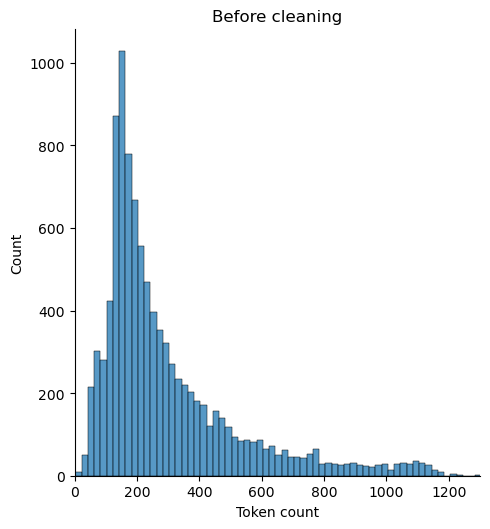

In [16]:
sns.displot(token_lens_raw)
plt.xlim([0, 1300])
plt.xlabel('Token count')
plt.title('Before cleaning')
plt.show()

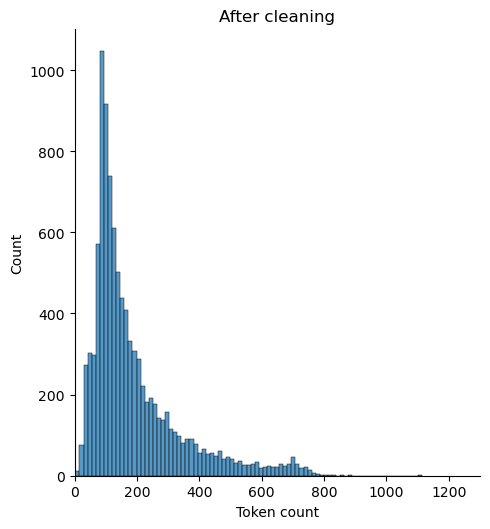

In [17]:
sns.displot(token_lens_cl)
plt.xlim([0, 1300])
plt.xlabel('Token count')
plt.title('After cleaning')
plt.show()

Rows removal

In [9]:
df_1 = pd.DataFrame(columns=['class', 'text'])
df_1['class'] = df['class']
df_1['text'] = df['cleaned_text']
df = df_1
df

,class,text
0,1,wreck ralph out mins pg cast john c reilly sar...
1,0,if you are not teenage boy doubt you will find...
2,0,one best films ve seen lately mandy moore shon...
3,1,somehow time didn t enjoy denzel performance u...
4,0,terrible acting they might well be reading fro...
...,...,...
573380,0,nice choice if you are romantic mood pitch per...
573381,0,well maybe ultimate which you could apply sayi...
573382,0,charlie angels bears little if any resemblance...
573383,0,read book before watching have say book isn t ...


### Balancing

In [10]:
df_non = df[df['class'] == 0]
df_spoiler = df[df['class'] == 1]
print("nonspoiler:", len(df_non))
print("spoiler:", len(df_spoiler))
#df_non = df_non.sample(frac =.4)
#print("weight-decreased nonspoiler:", len(df_non))
print("balanced total:", len(df_non)+len(df_spoiler))

nonspoiler: 422529
spoiler: 150856
balanced total: 573385


We should balance our dataset. 

In [11]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def count_long_token_seq(token_lens, threshold):
    summa = 0
    for length in token_lens:
        if length > threshold:
            summa += 1
    percentage = summa/len(token_lens)
    return summa, percentage

In [13]:
nonspoiler_text = df_non['text']
token_lens_nonspoil = count_len(nonspoiler_text) 

In [ ]:
spoiler_text = df_spoiler['text']
token_lens_spoil = count_len(spoiler_text) 

In [14]:
df_non['token_len'] = token_lens_nonspoil

/tmp/ipykernel_28/443028579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non['token_len'] = token_lens_nonspoil


In [15]:
df_non

,class,text,token_len
1,0,if you are not teenage boy doubt you will find...,54
2,0,one best films ve seen lately mandy moore shon...,97
4,0,terrible acting they might well be reading fro...,39
5,0,prince charming reduced dinner theater he want...,113
6,0,preview made seem lot more interesting than ac...,105
...,...,...,...
573379,0,when sat down watch film actually expected qui...,339
573380,0,nice choice if you are romantic mood pitch per...,75
573381,0,well maybe ultimate which you could apply sayi...,141
573382,0,charlie angels bears little if any resemblance...,103


In [ ]:
df_spoiler['token_len'] = token_lens_spoil

Count the longest sequences of tokens for nonspoiler reviews. Since our dataset is disbalanced, we could just drop unuseful rows.

In [38]:
count_long_token_seq(token_lens_nonspoil, 256)

(73280, 0.17343188278201022)

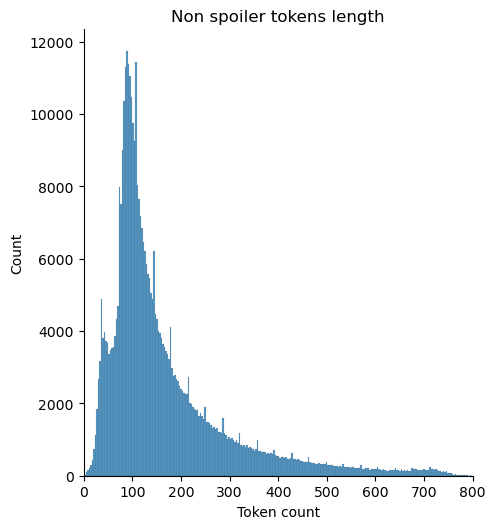

In [41]:
sns.displot(token_lens_nonspoil)
plt.xlim([0, 800])
plt.xlabel('Token count')
plt.title('Non spoiler tokens length')
plt.show()

We can just drop the longest nonspoiler reviews

In [16]:
df_non_new = df_non.drop(df_non[df_non.token_len > 256].index)
df_non_new.shape

(349249, 3)

Count the longest spoiler reviews

In [48]:
count_long_token_seq(token_lens_spoil, 256)

(52723, 0.34949223100175003)

So 52723 spoiler reviews (third of all) contain more than 256 tokens. We can't just drop them, so we need to split long spoilers on chunks

In [17]:
def split_review(df, review):
    words = word_tokenize(review)
    length = len(words) 
    if length <= 256:
        splitted_review = ' '.join(words)
        df = df.append(pd.Series([1, splitted_review, length], index=df.columns), ignore_index=True)
        return df
    elif 256 < length <= 384:
        to_256 = False
        num_parts = 2
    elif 384 < length <= 512:
        to_256 = True
        num_parts = 2
    elif 512 < length <= 640:
        to_256 = False
        num_parts = 3
    elif 640 < length <= 768:
        to_256 = True
        num_parts = 3
    elif 768 < length:
        to_256 = False
        num_parts = 4
        
    if to_256:
        part_length = 256
    else:
        part_length = len(words) // num_parts
    for i in range(num_parts):
            start_index = i * part_length
            end_index = start_index + part_length
            if i == num_parts - 1:
                end_index = length  
            splitted_review = ' '.join(words[start_index:end_index])
            df = df.append(pd.Series([1,splitted_review, length], index=df.columns), ignore_index=True)
    
   
    return df


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
df_sample = df_spoiler.sample(1000)


In [42]:
df_sample

,class,text
324265,1,really reminds me again first scary when relea...
568470,1,before write anything about masterpiece have t...
259711,1,judd apatow who wrote year old virgin knocked ...
532542,1,ok first off clearly doesn t deserve star just...
495154,1,peter pan dir p j hogan cast jeremy sumpter ja...
...,...,...
486312,1,from trailers thought would be cheap predictab...
119253,1,saw star wars episode ii revenge sith once wil...
23693,1,thelma louise film co produced directed by rid...
543016,1,shouldn t work but somehow manages most people...


In [20]:
df_spoiler_new = pd.DataFrame(columns=['class', 'text', 'token_len'])
for review in list(df_spoiler['text'].values):
    df_spoiler_new = split_review(df_spoiler_new, review)


In [28]:
df_spoiler

,class,text
0,1,wreck ralph out mins pg cast john c reilly sar...
3,1,somehow time didn t enjoy denzel performance u...
16,1,found site saw while ago saw just few minutes ...
17,1,warning following text contains critic spoiler...
19,1,johnny lisa are about get married lisa gets ti...
...,...,...
573357,1,an old adage goes if on certain day everyone w...
573363,1,there never dull moment lob some dialogue joke...
573369,1,truly an amazing film what seemingly starts of...
573375,1,remember watching with my mum brother at end m...


In [38]:
df_spoiler_new = df_spoiler_new.drop('token_len', axis=1)

In [37]:
print(len((df_spoiler_new.iloc[4]['text']).split()))

256


In [39]:
df_spoiler_new

,class,text
0,1,wreck ralph out mins pg cast john c reilly sar...
1,1,somehow time didn t enjoy denzel performance u...
2,1,found site saw while ago saw just few minutes ...
3,1,t make any sense after while ending odd say le...
4,1,warning following text contains critic spoiler...
...,...,...
218239,1,there never dull moment lob some dialogue joke...
218240,1,truly an amazing film what seemingly starts of...
218241,1,other spielberg kubrick films oh yes course th...
218242,1,remember watching with my mum brother at end m...


In [21]:
token_lens_spoil = df_spoiler_new['token_len'].values


In [25]:
df_spoiler_new.shape

(218244, 3)

train test split

In [43]:
df_non_fin = df_non_new
print("nonspoiler:", len(df_non_new))
print("spoiler:", len(df_spoiler_new))
df_non_fin = df_non_fin.sample(frac =.63)
print("weight-decreased nonspoiler:", len(df_non_fin))
print("balanced total:", len(df_non_fin)+len(df_spoiler_new))

nonspoiler: 349249
spoiler: 218244
weight-decreased nonspoiler: 220027
balanced total: 438271


In [44]:
df_spoiler_fin = df_spoiler_new

In [45]:
df_non = df_non_fin
df_spoiler = df_spoiler_fin

In [46]:
# 70/10/20 train/val/test
df_train_non = df_non.sample(frac = .70)
df_non = df_non.drop(df_train_non.index)
df_train_spoiler = df_spoiler.sample(frac = .70)
df_spoiler = df_spoiler.drop(df_train_spoiler.index)

# use 33% of the remaining for validation (which is 10% of whole dataset)
df_dev_non = df_non.sample(frac = .333)
df_non = df_non.drop(df_dev_non.index)
df_dev_spoiler = df_spoiler.sample(frac = .333)
df_spoiler = df_spoiler.drop(df_dev_spoiler.index)

# use all of the remaining for test (which is 20% of whole dataset)
df_test_non = df_non
df_test_spoiler = df_spoiler

In [47]:

df_train = pd.concat([df_train_non, df_train_spoiler])
df_train = df_train.sample(frac=1).reset_index(drop=True)

df_dev = pd.concat([df_dev_non, df_dev_spoiler])
df_dev = df_dev.sample(frac=1).reset_index(drop=True)

df_test = pd.concat([df_test_non, df_test_spoiler])
df_test = df_test.sample(frac=1).reset_index(drop=True)

print("train:",len(df_train))
print("dev:",len(df_dev))
print("test:",len(df_test))
print("all:",len(df_train)+len(df_dev)+len(df_test))

train: 306790
dev: 43784
test: 87697
all: 438271


In [50]:
df_train.to_csv('/kaggle/working/train.csv', index=False)
df_dev.to_csv('/kaggle/working/dev.csv', index=False)
df_test.to_csv('/kaggle/working/test.csv', index=False)

In [28]:
df_train.head(5)


,class,text
0,0,art if had say one thing about would be art wh...
1,0,possibly best entire scary franchise my opinio...
2,0,koala who owns theatre decides throw singing c...
3,1,great film made by masterful director akira ku...
4,0,haven t laughed so much theatre very long time...


## Libraries

In [51]:
import torch

In [52]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


##Preliminaries

In [53]:
source_folder = '/kaggle/working/'

In [55]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

In [56]:
# Model parameter
MAX_SEQ_LEN = 256
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('class', label_field), ('text', text_field)]

# TabularDataset

train, valid, test = TabularDataset.splits(path=source_folder, train='train.csv', validation='dev.csv',
                                           test='test.csv', format='CSV', fields=fields, skip_header=True)


# Iterators

train_iter = BucketIterator(train, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=32, device=device, train=False, shuffle=False, sort=False)

##Models

In [57]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "roberta-base"
        self.encoder = RobertaForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]

        return loss, text_fea

##Training

In [58]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [59]:
destination_folder = '/kaggle/working/'

In [60]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 2,
          eval_every = len(train_iter) // 2,
          file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for (labels, texts), _ in train_loader:
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            texts = texts.type(torch.LongTensor)  
            texts = texts.to(device)
            output = model(texts, labels)
            loss, _ = output

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (labels, texts), _ in valid_loader:
                        labels = labels.type(torch.LongTensor)           
                        labels = labels.to(device)
                        texts = texts.type(torch.LongTensor)  
                        texts = texts.to(device)
                        output = model(texts, labels)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

In [61]:
model = BERT().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should pr

Epoch [1/2], Step [4794/19176], Train Loss: 0.4957, Valid Loss: 0.4998
Model saved to ==> /kaggle/working//model.pt
Model saved to ==> /kaggle/working//metrics.pt
Epoch [1/2], Step [9588/19176], Train Loss: 0.4144, Valid Loss: 1.9011
Epoch [2/2], Step [14382/19176], Train Loss: 0.4387, Valid Loss: 0.4752
Model saved to ==> /kaggle/working//model.pt
Model saved to ==> /kaggle/working//metrics.pt
Epoch [2/2], Step [19176/19176], Train Loss: 0.3574, Valid Loss: 1.4523
Model saved to ==> /kaggle/working//metrics.pt
Finished Training!


In [62]:
import matplotlib.pyplot as plt
from sklearn import metrics

Model loaded from <== /kaggle/working//metrics.pt


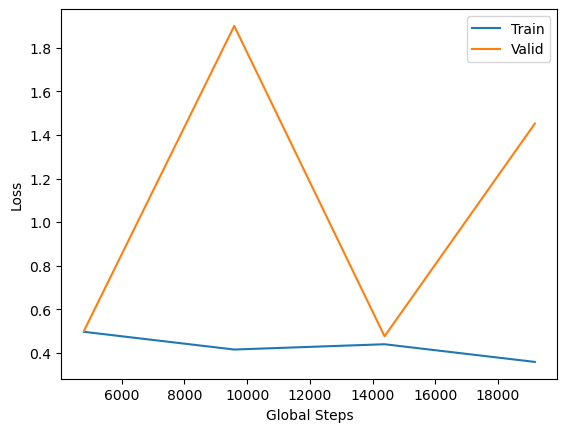

In [63]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [66]:
from sklearn.metrics import classification_report

##Evaluation

In [71]:
# Evaluation Function

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (labels, texts), _ in test_loader:

                labels = labels.type(torch.LongTensor)           
                labels = labels.to(device)
                texts = texts.type(torch.LongTensor)  
                texts = texts.to(device)
                output = model(texts, labels)

                _, output = output
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['SPOILER', 'NON-SPOILER'])
    ax.yaxis.set_ticklabels(['SPOILER', 'NON-SPOILER'])
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
    print('accuracy = ', accuracy_score(y_true, y_pred))
    print("AUC=", metrics.auc(fpr, tpr))
    

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should pr

Model loaded from <== /kaggle/working//model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.7567    0.8248    0.7893     43670
           0     0.8092    0.7370    0.7714     44027

    accuracy                         0.7807     87697
   macro avg     0.7829    0.7809    0.7803     87697
weighted avg     0.7830    0.7807    0.7803     87697

accuracy =  0.7806880509025395
AUC= 0.7808668009886246


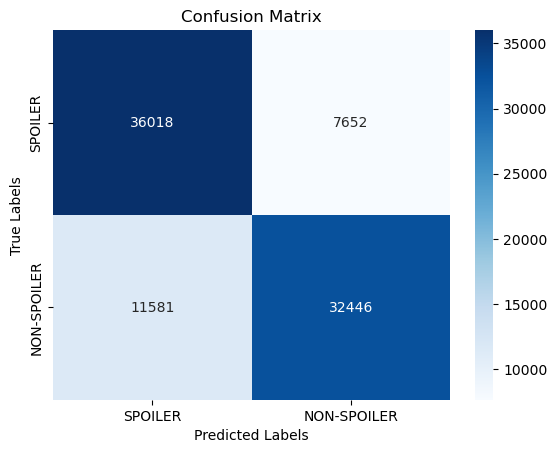

In [72]:
best_model = BERT().to(device)

load_checkpoint(destination_folder + '/model.pt', best_model)

evaluate(best_model, test_iter)